In [1]:
# Import package
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Working with dates

In [2]:
# Import data
retail = pd.read_csv('online_retail2.csv').drop_duplicates().dropna(axis=0, how='any').reset_index(drop=True)
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
797881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
797882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
797883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [3]:
# Check data types of each column
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 48.7+ MB


In [4]:
# Change the data type of the 'InvoiceDate' column to datetime
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['InvoiceDate']

0        2009-12-01 07:45:00
1        2009-12-01 07:45:00
2        2009-12-01 07:45:00
3        2009-12-01 07:45:00
4        2009-12-01 07:45:00
                 ...        
797880   2011-12-09 12:50:00
797881   2011-12-09 12:50:00
797882   2011-12-09 12:50:00
797883   2011-12-09 12:50:00
797884   2011-12-09 12:50:00
Name: InvoiceDate, Length: 797885, dtype: datetime64[ns]

In [5]:
# Recheck the data types of each column
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 48.7+ MB


In [6]:
# Get the year from the 'InvoiceDate' column
retail['InvoiceDate'].dt.year

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
797880    2011
797881    2011
797882    2011
797883    2011
797884    2011
Name: InvoiceDate, Length: 797885, dtype: int32

In [7]:
# Get the month from the 'InvoiceDate' column
retail['InvoiceDate'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
797880    12
797881    12
797882    12
797883    12
797884    12
Name: InvoiceDate, Length: 797885, dtype: int32

In [8]:
# Get the week from the 'InvoiceDate' column
retail['InvoiceDate'].dt.isocalendar().week

0         49
1         49
2         49
3         49
4         49
          ..
797880    49
797881    49
797882    49
797883    49
797884    49
Name: week, Length: 797885, dtype: UInt32

In [9]:
# Get the day from the 'InvoiceDate' column
retail['InvoiceDate'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
797880    9
797881    9
797882    9
797883    9
797884    9
Name: InvoiceDate, Length: 797885, dtype: int32

In [10]:
# Convert the 'InvoiceDate' column to a string with the format 'B Y'
retail['InvoiceDate'].dt.strftime('%B %Y')

0         December 2009
1         December 2009
2         December 2009
3         December 2009
4         December 2009
              ...      
797880    December 2011
797881    December 2011
797882    December 2011
797883    December 2011
797884    December 2011
Name: InvoiceDate, Length: 797885, dtype: object

In [11]:
# Get max date from 'InvoiceDate' column
retail['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [12]:
# Get min date from 'InvoiceDate' column
retail['InvoiceDate'].min()

Timestamp('2009-12-01 07:45:00')

In [13]:
# Range of date from 'InvoiceDate' column"
retail['InvoiceDate'].max()-retail['InvoiceDate'].min()

Timedelta('738 days 05:05:00')

## 2. Recency

In [14]:
# Recency of purchase (how long from the last purchase until now)

# Max date
max_date = retail['InvoiceDate'].max()

# Last purchase date by each customer
last_purchase_date = retail.groupby(by='Customer ID', 
                                    as_index=False)['InvoiceDate'].max()

# Calculate recency
last_purchase_date['Recency'] = max_date - last_purchase_date['InvoiceDate']
last_purchase_date

,Customer ID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,325 days 02:33:00
1,12347.0,2011-12-07 15:52:00,1 days 20:58:00
2,12348.0,2011-09-25 13:13:00,74 days 23:37:00
3,12349.0,2011-11-21 09:51:00,18 days 02:59:00
4,12350.0,2011-02-02 16:01:00,309 days 20:49:00
...,...,...,...
5937,18283.0,2011-12-06 12:02:00,3 days 00:48:00
5938,18284.0,2010-10-06 12:31:00,429 days 00:19:00
5939,18285.0,2010-02-17 10:24:00,660 days 02:26:00
5940,18286.0,2010-08-20 11:57:00,476 days 00:53:00


In [15]:
# Describe the result of recency
last_purchase_date['Recency'].describe()

count                           5942
mean     202 days 10:33:55.930663076
std      211 days 21:00:52.495651984
min                  0 days 00:00:00
25%                 24 days 01:41:45
50%                 95 days 12:20:00
75%                380 days 22:12:00
max                738 days 02:55:00
Name: Recency, dtype: object

(array([1012.,  683.,  417.,  326.,  274.,  197.,  110.,  116.,   84.,
          90.,   95.,   93.,   88.,   72.,   79.,   61.,   70.,   81.,
          76.,   54.,   56.,   68.,   42.,   13.,   74.,  159.,  145.,
         131.,  132.,   98.,   64.,   67.,   51.,   43.,   47.,   43.,
          58.,   42.,   49.,   52.,   59.,   41.,   57.,   39.,   38.,
          39.,   49.,    8.,   19.,   81.]),
 array([  0.  ,  14.76,  29.52,  44.28,  59.04,  73.8 ,  88.56, 103.32,
        118.08, 132.84, 147.6 , 162.36, 177.12, 191.88, 206.64, 221.4 ,
        236.16, 250.92, 265.68, 280.44, 295.2 , 309.96, 324.72, 339.48,
        354.24, 369.  , 383.76, 398.52, 413.28, 428.04, 442.8 , 457.56,
        472.32, 487.08, 501.84, 516.6 , 531.36, 546.12, 560.88, 575.64,
        590.4 , 605.16, 619.92, 634.68, 649.44, 664.2 , 678.96, 693.72,
        708.48, 723.24, 738.  ]),
 <BarContainer object of 50 artists>)

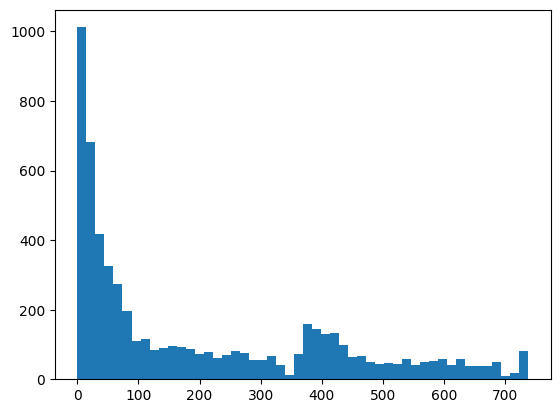

In [16]:
# Create a column 'Recency_days' from 'Recency' column in days
last_purchase_date['Recency_days'] = last_purchase_date['Recency'].dt.components['days']

# Plot the histogram of 'Recency_days' column
plt.hist(last_purchase_date['Recency_days'], bins=50)

## 3. Inter-arrival time

In [17]:
# Count unique of customer ID
customers = retail['Customer ID'].unique()
len(customers)

5942

In [18]:
# Create column 'date' from 'InvoiceDate' column with format 'Y-m-d'
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y-%m-%d')

# Group the data by 'Customer ID' and 'date' column with count to list each pair of customer and date
customer_grouped = retail.groupby(by = ['Customer ID','date'], as_index=False).agg('count')[['Customer ID','date']]
customer_grouped

,Customer ID,date
0,12346.0,2009-12-14
1,12346.0,2009-12-18
2,12346.0,2010-01-04
3,12346.0,2010-01-14
4,12346.0,2010-01-22
...,...,...
38497,18287.0,2010-09-21
38498,18287.0,2010-11-22
38499,18287.0,2011-05-22
38500,18287.0,2011-10-12


C:\Users\thanh\AppData\Local\Temp\ipykernel_3652\1899924067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_d['previous_date'] = c_d['date'].shift(1)
C:\Users\thanh\AppData\Local\Temp\ipykernel_3652\1899924067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_d['previous_date'] = c_d['date'].shift(1)
C:\Users\thanh\AppData\Local\Temp\ipykernel_3652\1899924067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

(array([368., 525., 547., 496., 413., 357., 284., 190., 191., 150., 111.,
         92.,  95.,  80.,  72.,  49.,  43.,  33.,  28.,  25.,  14.,  23.,
         14.,  19.,  10.,  29.,  36.,  21.,  19.,  10.,   3.,   2.,   5.,
          1.,   3.,   6.,   2.,   5.,   5.,   2.,   1.,   2.,   2.,   7.,
          1.,   1.,   1.,   1.,   0.,   4.]),
 array([  1. ,  14.8,  28.6,  42.4,  56.2,  70. ,  83.8,  97.6, 111.4,
        125.2, 139. , 152.8, 166.6, 180.4, 194.2, 208. , 221.8, 235.6,
        249.4, 263.2, 277. , 290.8, 304.6, 318.4, 332.2, 346. , 359.8,
        373.6, 387.4, 401.2, 415. , 428.8, 442.6, 456.4, 470.2, 484. ,
        497.8, 511.6, 525.4, 539.2, 553. , 566.8, 580.6, 594.4, 608.2,
        622. , 635.8, 649.6, 663.4, 677.2, 691. ]),
 <BarContainer object of 50 artists>)

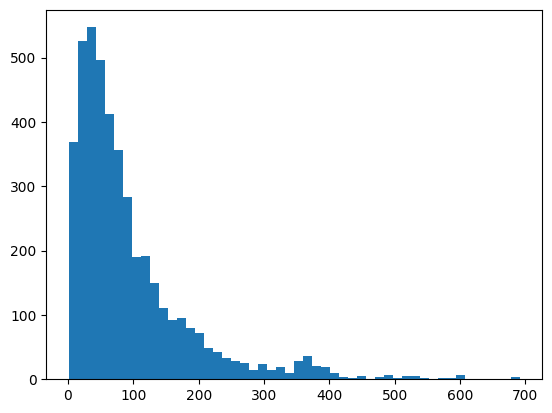

In [19]:
# Create a dataframe to store the inter-arrival time
interarrival = pd.DataFrame()

# Loop through each customer
for customer in customers:
    # Filter the row with the customer ID
    c_d = customer_grouped[customer_grouped['Customer ID'] == customer]

    # Create a column 'previous_date' from 'date' column with shift 1
    c_d['previous_date'] = c_d['date'].shift(1)

    # Append the result to the 'interarrival' dataframe
    interarrival = pd.concat([interarrival, c_d], axis = 0)

# Convert the 'date' and 'previous_date' column to datetime
interarrival['date'] = pd.to_datetime(interarrival['date'])
interarrival['previous_date'] = pd.to_datetime(interarrival['previous_date'])

# Calculate the inter-arrival time by row
interarrival['duration'] = interarrival['date'] - interarrival['previous_date']
interarrival['duration'] = interarrival['duration'].dt.components['days']

# Calculate average inter-arrival time for each customer
interarrival = interarrival.groupby('Customer ID')['duration'].mean()

# Plot the histogram of 'duration' column
plt.hist(interarrival, bins=50)


## 4. Resampling

In [20]:
# Import data
stocks = pd.read_csv('stocks.csv', index_col='Date', parse_dates=True)
stocks.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.0000,108.0625,116.5625
2000-01-04,102.500003,112.0625,102.0000,112.6250
2000-01-05,103.999997,116.0000,101.6875,113.8125
2000-01-06,94.999998,114.0000,100.0000,110.0000
2000-01-07,99.500001,113.5000,105.8750,111.4375


<Axes: xlabel='Date'>

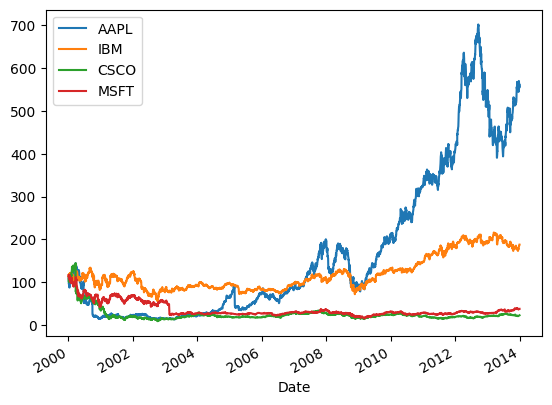

In [21]:
# Plot the stock price by timeseries
stocks.plot()

<Axes: xlabel='Date'>

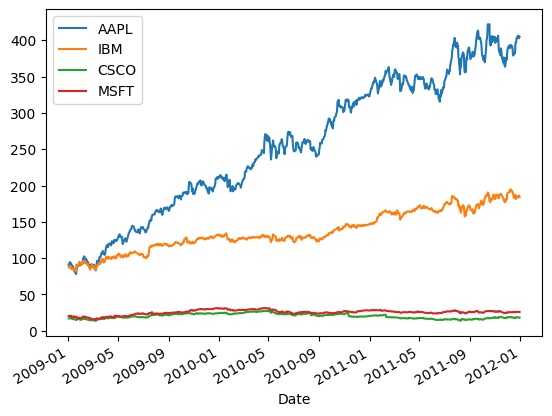

In [22]:
# Plot the stock price by timeseries in 2009-2011
stocks['2009':'2011'].plot()

In [23]:
# Resample the stock price by monthly mean
monthly_series_mean = stocks.resample('M').mean()
monthly_series_mean.head()

C:\Users\thanh\AppData\Local\Temp\ipykernel_3652\2151943285.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_series_mean = stocks.resample('M').mean()


,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-31,103.359375,116.818750,107.590625,107.115625
2000-02-29,111.638281,113.237500,127.730469,99.300000
2000-03-31,128.502717,111.527174,117.514946,99.815217
2000-04-30,123.105263,114.154605,68.007401,79.009868
2000-05-31,100.810368,107.687500,59.800426,67.071023


<Axes: xlabel='Date'>

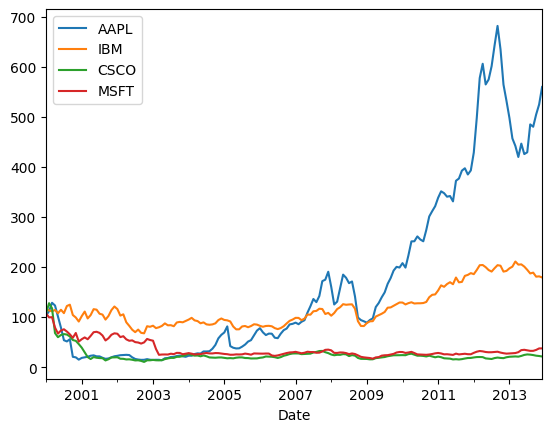

In [24]:
# Plot the stock price by monthly mean
monthly_series_mean.plot()

C:\Users\thanh\AppData\Local\Temp\ipykernel_3652\301717269.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_series_mean = stocks.resample('Y').mean()


<Axes: xlabel='Date'>

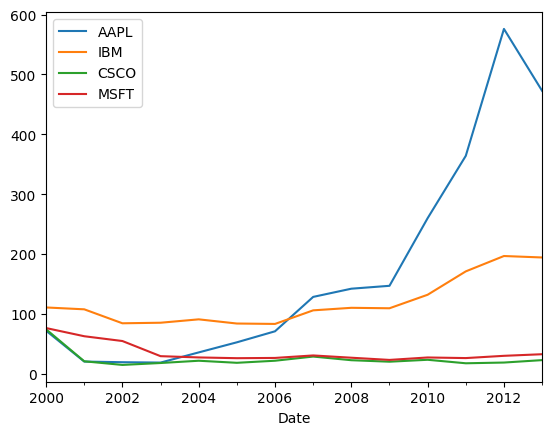

In [25]:
# Resample the stock price by yearly mean
yearly_series_mean = stocks.resample('Y').mean()
yearly_series_mean.plot()

<Axes: xlabel='Date'>

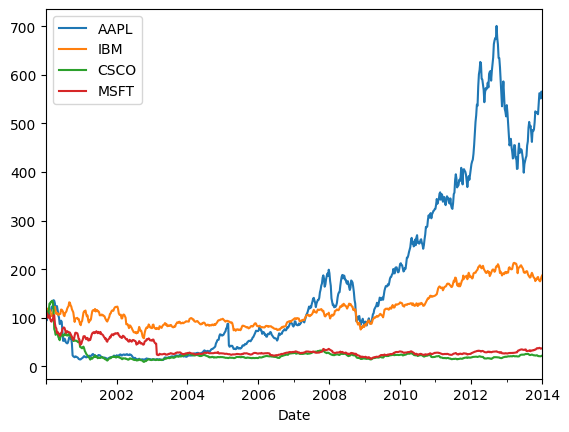

In [26]:
weekly_series_mean = stocks.resample('W').mean()
weekly_series_mean.plot()

<Axes: xlabel='Date'>

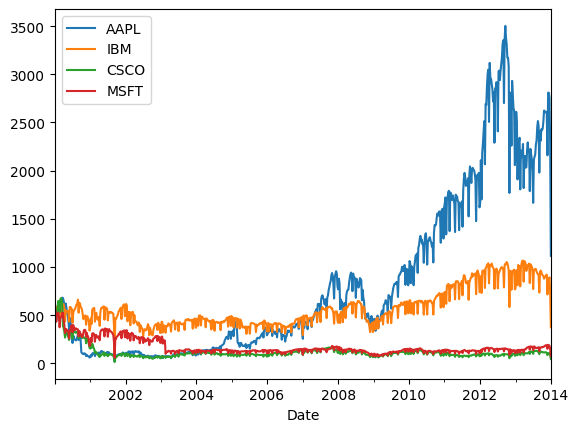

In [27]:
# Resample the stock price by monthly sum
weekly_series_sum = stocks.resample('W').sum()
weekly_series_sum.plot()

## 5. Rolling mean/Moving average

In [28]:
# Filter MSFT stock
MSFT = stocks[['MSFT']]
MSFT

,MSFT
Date,
2000-01-03,116.562500
2000-01-04,112.625000
2000-01-05,113.812500
2000-01-06,110.000000
2000-01-07,111.437500
...,...
2013-12-24,37.080002
2013-12-26,37.439999
2013-12-27,37.290001


In [29]:
# Calculate the rolling mean (moving average) of MSFT stock by 7 days and 30 days
MSFT['rolling_weekly'] = MSFT['MSFT'].rolling(window = 7).mean()
MSFT['rolling_monthly'] = MSFT['MSFT'].rolling(window = 30).mean()
MSFT

C:\Users\thanh\AppData\Local\Temp\ipykernel_3652\2843562959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT['rolling_weekly'] = MSFT['MSFT'].rolling(window = 7).mean()
C:\Users\thanh\AppData\Local\Temp\ipykernel_3652\2843562959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT['rolling_monthly'] = MSFT['MSFT'].rolling(window = 30).mean()


,MSFT,rolling_weekly,rolling_monthly
Date,,,
2000-01-03,116.562500,NaN,NaN
2000-01-04,112.625000,NaN,NaN
2000-01-05,113.812500,NaN,NaN
2000-01-06,110.000000,NaN,NaN
2000-01-07,111.437500,NaN,NaN
...,...,...,...
2013-12-24,37.080002,36.677143,37.507667
2013-12-26,37.439999,36.755714,37.510334
2013-12-27,37.290001,36.865715,37.481334


<Axes: xlabel='Date'>

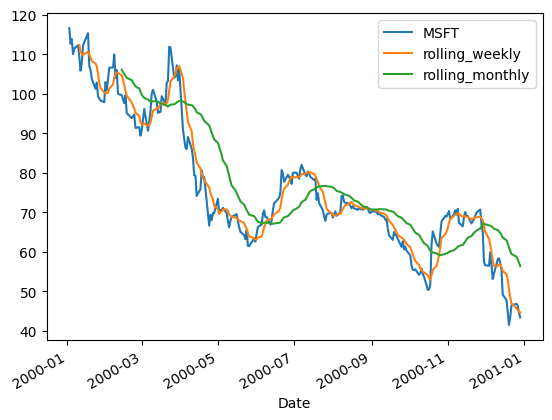

In [30]:
# Plot the MSFT stock price and the rolling mean
MSFT.loc['2000'].plot()